In [1]:
import numpy as np
from IPython import display
from d2l import torch as d2l

In [2]:
def f(x):
    return 3 * x ** 2 - 4 * x

In [3]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

In [4]:
h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [5]:
def use_svg_display():  #@save
    """使用svg格式在Jupyter中显示绘图"""
    display.set_matplotlib_formats('svg')

In [6]:
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """设置matplotlib的图表大小"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [7]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [8]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

C:\Users\36141\AppData\Local\Temp\ipykernel_8328\1575940066.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


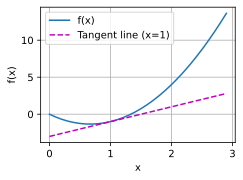

In [9]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

## test

C:\Users\36141\AppData\Local\Temp\ipykernel_8328\1116543709.py:3: RuntimeWarning: divide by zero encountered in true_divide
  plot(x, [x ** 3 - 1 / x, 4 * x - 4], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])
C:\Users\36141\AppData\Local\Temp\ipykernel_8328\1575940066.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


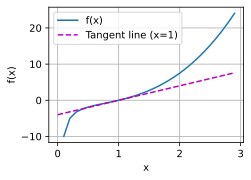

In [10]:
# y = f(x) = x ** 3 - 1 / x 在 x = 1 处切线的图像  (4 * x - 4) 是此处的切线
x = np.arange(0, 3, 0.1)
plot(x, [x ** 3 - 1 / x, 4 * x - 4], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])